# Multiple Linear Regression ; Auto MPG
- Predict Auto MPG based on multiple linear regression model

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


## Importing the libraries

In [ ]:
import pandas as pd
import seaborn as sns
import numpy as np

## Importing the dataset

In [ ]:
dataset = pd.read_csv('/content/drive/MyDrive/DS/auto-mpg.csv')

In [ ]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           398 non-null    float64
 1   cylinders     398 non-null    int64  
 2   displacement  398 non-null    float64
 3   horsepower    398 non-null    object 
 4   weight        398 non-null    int64  
 5   acceleration  398 non-null    float64
 6   model year    398 non-null    int64  
 7   origin        398 non-null    int64  
 8   car name      398 non-null    object 
dtypes: float64(3), int64(4), object(2)
memory usage: 28.1+ KB


In [ ]:
dataset.describe()

,mpg,cylinders,displacement,weight,acceleration,model year,origin
count,398.000000,398.000000,398.000000,398.000000,398.000000,398.000000,398.000000
mean,23.514573,5.454774,193.425879,2970.424623,15.568090,76.010050,1.572864
std,7.815984,1.701004,104.269838,846.841774,2.757689,3.697627,0.802055
min,9.000000,3.000000,68.000000,1613.000000,8.000000,70.000000,1.000000
25%,17.500000,4.000000,104.250000,2223.750000,13.825000,73.000000,1.000000
50%,23.000000,4.000000,148.500000,2803.500000,15.500000,76.000000,1.000000
75%,29.000000,8.000000,262.000000,3608.000000,17.175000,79.000000,2.000000
max,46.600000,8.000000,455.000000,5140.000000,24.800000,82.000000,3.000000


In [ ]:
dataset.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,car name
0,18.0,8,307.0,130,3504,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165,3693,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150,3436,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150,3433,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140,3449,10.5,70,1,ford torino


we can't use 'car name' columns to predict Auto mpg, so we  drop it.

In [ ]:
dataset = dataset.drop(['car name'], axis = 1)

# Handle missing values

In [ ]:
hp_nan = pd.DataFrame(dataset.horsepower.str.isdigit())
dataset[hp_nan['horsepower'] == False]

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin
32,25.0,4,98.0,?,2046,19.0,71,1
126,21.0,6,200.0,?,2875,17.0,74,1
330,40.9,4,85.0,?,1835,17.3,80,2
336,23.6,4,140.0,?,2905,14.3,80,1
354,34.5,4,100.0,?,2320,15.8,81,2
374,23.0,4,151.0,?,3035,20.5,82,1


In [ ]:
# replace missing values by median
dataset = dataset.replace('?', np.nan)
median_hp = dataset['horsepower'].median()
dataset['horsepower'].replace(np.nan,median_hp,inplace=True)

In [ ]:
# recheck
hp_nan = pd.DataFrame(dataset.horsepower.str.isdigit())
dataset[hp_nan['horsepower'] == False]

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin


In [ ]:
check = dataset['horsepower']
check[32]

93.5

In [ ]:
dataset.to_csv('mpg_isclean.csv',index=False)

## Convert data type

In [ ]:
# Convert data type of horse power form object to integer
dataset['horsepower'] = dataset['horsepower'].astype('float64')

## Visualising the data
- Visualize to see the relationship of variables which may help us selecting variables to create a model

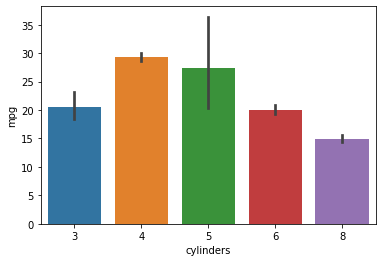

In [ ]:
# cylinders
sns.barplot(data=dataset, x="cylinders", y="mpg",
            estimator=np.average)

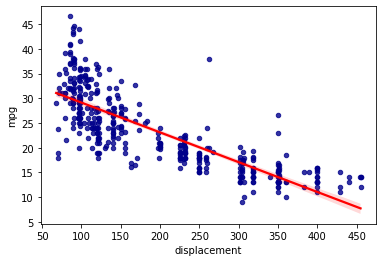

In [ ]:
# displacement
sns.regplot(data=dataset, x="displacement", y="mpg",
            scatter_kws={"color": "darkblue",'s': 20},
            line_kws={"color": "red"})

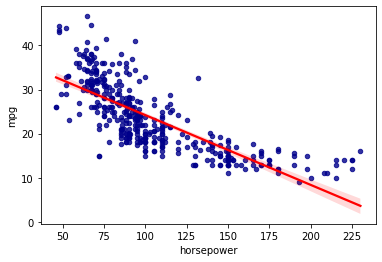

In [ ]:
# horsepower
sns.regplot(data=dataset, x="horsepower", y="mpg",
            scatter_kws={"color": "darkblue",'s': 20}, 
            line_kws={"color": "red"})

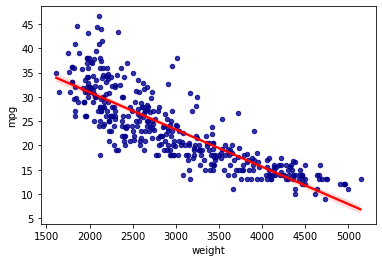

In [ ]:
# weight
sns.regplot(data=dataset, x="weight", y="mpg",
            scatter_kws={"color": "darkblue",'s': 20},
            line_kws={"color": "red"})

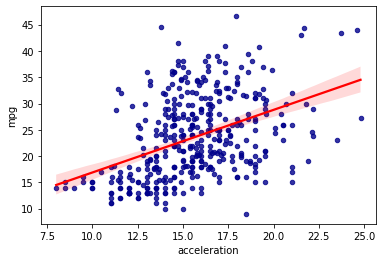

In [ ]:
# acceleration
sns.regplot(data=dataset, x="acceleration", y="mpg",
            scatter_kws={"color": "darkblue",'s': 20},
            line_kws={"color": "red"})

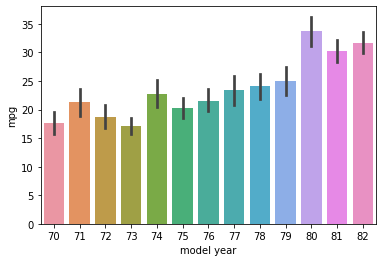

In [ ]:
# model
sns.barplot(data=dataset, x="model year", y="mpg",
           estimator=np.average)

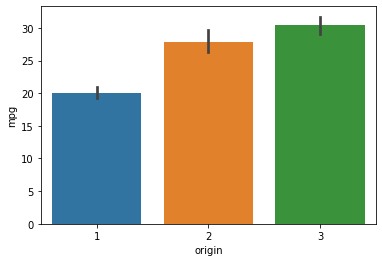

In [ ]:
# origin
sns.barplot(data=dataset, x="origin", y="mpg",
           estimator=np.average)

## Pearson's Correlation
- summarize the strength of the linear relationship between auto mpg and others

In [ ]:
dataset.corr(method ='pearson')

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin
mpg,1.000000,-0.775396,-0.804203,-0.773453,-0.831741,0.420289,0.579267,0.563450
cylinders,-0.775396,1.000000,0.950721,0.841284,0.896017,-0.505419,-0.348746,-0.562543
displacement,-0.804203,0.950721,1.000000,0.895778,0.932824,-0.543684,-0.370164,-0.609409
horsepower,-0.773453,0.841284,0.895778,1.000000,0.862442,-0.686590,-0.413733,-0.452096
weight,-0.831741,0.896017,0.932824,0.862442,1.000000,-0.417457,-0.306564,-0.581024
acceleration,0.420289,-0.505419,-0.543684,-0.686590,-0.417457,1.000000,0.288137,0.205873
model year,0.579267,-0.348746,-0.370164,-0.413733,-0.306564,0.288137,1.000000,0.180662
origin,0.563450,-0.562543,-0.609409,-0.452096,-0.581024,0.205873,0.180662,1.000000


From Pearson's Correlation, I will choose cylinders, displacement, horsepower and weight in my model

## Handle Dummy Variables (cylinders)

In [ ]:
# Get one hot encoding of columns 'cylinders'
one_hot = pd.get_dummies(dataset['cylinders'])

# Drop column as it is now encoded
dataset = dataset.drop('cylinders',axis = 1)

# Join the encoded df
dataset = dataset.join(one_hot)
dataset 

,mpg,displacement,horsepower,weight,acceleration,model year,origin,3,4,5,6,8
0,18.0,307.0,130.0,3504,12.0,70,1,0,0,0,0,1
1,15.0,350.0,165.0,3693,11.5,70,1,0,0,0,0,1
2,18.0,318.0,150.0,3436,11.0,70,1,0,0,0,0,1
3,16.0,304.0,150.0,3433,12.0,70,1,0,0,0,0,1
4,17.0,302.0,140.0,3449,10.5,70,1,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...
393,27.0,140.0,86.0,2790,15.6,82,1,0,1,0,0,0
394,44.0,97.0,52.0,2130,24.6,82,2,0,1,0,0,0
395,32.0,135.0,84.0,2295,11.6,82,1,0,1,0,0,0
396,28.0,120.0,79.0,2625,18.6,82,1,0,1,0,0,0


Drop others columns that we don't use to make a model.

In [ ]:
dataset = dataset.drop(['acceleration', 'model year', 'origin'],axis = 1)
dataset

,mpg,displacement,horsepower,weight,3,4,5,6,8
0,18.0,307.0,130.0,3504,0,0,0,0,1
1,15.0,350.0,165.0,3693,0,0,0,0,1
2,18.0,318.0,150.0,3436,0,0,0,0,1
3,16.0,304.0,150.0,3433,0,0,0,0,1
4,17.0,302.0,140.0,3449,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...
393,27.0,140.0,86.0,2790,0,1,0,0,0
394,44.0,97.0,52.0,2130,0,1,0,0,0
395,32.0,135.0,84.0,2295,0,1,0,0,0
396,28.0,120.0,79.0,2625,0,1,0,0,0


## Splitting the dataset into the Training set and Test set

In [ ]:
X = dataset.iloc[:, 1:].values
y = dataset.iloc[:, 0].values

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

## Training the Multiple Linear Regression model on the Training set

In [ ]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X_train, y_train)

LinearRegression()

## Predicting the Test set results

In [ ]:
y_pred = regressor.predict(X_test)
np.set_printoptions(precision=2)
print(np.concatenate((y_pred.reshape(len(y_pred),1), y_test.reshape(len(y_test),1)),1))

pred = np.concatenate((y_pred.reshape(len(y_pred),1), y_test.reshape(len(y_test),1)),1)
pd.DataFrame(pred).to_csv('mpg_pred.csv',index=False)

[[33.42 33.  ]
 [28.01 28.  ]
 [22.46 19.  ]
 [16.2  13.  ]
 [14.89 14.  ]
 [29.9  27.  ]
 [26.05 24.  ]
 [ 8.05 13.  ]
 [18.44 17.  ]
 [21.97 21.  ]
 [13.75 15.  ]
 [31.81 38.  ]
 [31.68 26.  ]
 [16.49 15.  ]
 [28.51 25.  ]
 [ 9.54 12.  ]
 [27.91 31.  ]
 [19.08 17.  ]
 [12.68 16.  ]
 [31.73 31.  ]
 [28.69 22.  ]
 [22.08 22.  ]
 [20.84 22.  ]
 [30.31 33.5 ]
 [19.4  18.  ]
 [31.97 44.  ]
 [29.05 26.  ]
 [26.79 24.5 ]
 [17.68 18.1 ]
 [10.45 12.  ]
 [26.75 27.  ]
 [31.24 36.  ]
 [17.73 23.  ]
 [28.6  24.  ]
 [31.73 37.2 ]
 [ 9.37 16.  ]
 [23.17 21.  ]
 [18.85 19.2 ]
 [13.74 16.  ]
 [29.68 29.  ]
 [21.58 26.8 ]
 [32.79 27.  ]
 [24.63 18.  ]
 [ 9.02 10.  ]
 [27.44 23.  ]
 [29.51 36.  ]
 [29.95 26.  ]
 [25.6  25.  ]
 [28.22 25.  ]
 [30.44 25.  ]
 [29.29 22.  ]
 [31.92 34.1 ]
 [29.99 32.4 ]
 [11.18 13.  ]
 [21.78 23.5 ]
 [11.91 14.  ]
 [15.97 18.5 ]
 [26.89 29.8 ]
 [28.82 28.  ]
 [20.03 19.  ]
 [15.4  11.  ]
 [33.42 33.  ]
 [27.6  23.  ]
 [25.97 21.  ]
 [21.77 23.  ]
 [28.82 25.  ]
 [26.46 23

## R Square and RMSE of the model

In [ ]:
from sklearn.metrics import r2_score, mean_squared_error
r_square = print("R Square : ", r2_score(y_test, y_pred))
rmse = print("RMSE : ", mean_squared_error(y_test, y_pred, squared = True))

R Square :  0.7451225090616242
RMSE :  13.70385627967932


Conclusion: The mileage for cars was predicted using a Linear Regression model, Pandas, numpy and sklearn. giving a validation mean-squared error of 13.70.

